# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 2381 Соколов Сергей Александрович и Тищенко Артем Михайлович. Вариант №2.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения


В данной лабораторной работе будут рассматриваться линейные комбинации для следующих дискретных сигналов:

**Дискретный единичный скачок $σ_d(k)$:**
$$σ_d(k) = \begin{cases}
1, & k \geq 0 \\
0, & k < 0
 \end{cases}$$
И его модификация в виде **дискретного единичный скачка с задержкой $σ_d(k)$:**
$$σ_d(k - m) = \begin{cases}
1, & k \geq m \\
0, & k < m
 \end{cases}$$

**Дискретный гармонический сигнал $s(k)$:**
$$s(k) = A\cos(kw + \phi)$$

И их характеристики:

Среднее значение: $\overline{s} = \frac{1}{T}∫_0^Ts(t)dt$

Энергия: $E = ∫_0^Ts^2(t)dt$

Средняя мощность: $P = \frac{1}{T}∫_0^Ts^2(t)dt$

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
Nb = 2  # Номер бригады
N = 30 + Nb % 5 # Длина последовательности
a = (-1)**Nb * (0.8) + 0.005 * (Nb % 20)    # Основание экспоненты
C = 1 + Nb % 5  # Амплитуда гармонического сигнала
w0 = np.pi / (6 + Nb % 5)   # Частота гармонического сигнала
U = Nb % 20 + 1 # Амплитуда импульса
n0 = 3 + Nb % 5 # Начальный момент импульса
n_imp = 5 + Nb % 5  # Длина импульса
B1 = 1.5 + Nb % 5   # Амплитуда 1 гармонического сигнала
B2 = 5.7 - Nb % 5   #  Амплитуда 2 гармонического сигнала
B3 = 2.2 + Nb % 5   #  Амплитуда 3 гармонического сигнала
w1 = np.pi / (4 + Nb % 5)   # Частота 1 гармонического сигнала
w2 = np.pi / (8 + Nb % 5)   # Частота 2 гармонического сигнала
w3 = np.pi / (16 + Nb % 5)  # Частота 3 гармонического сигнала
a1 = 1.5 - Nb % 5   # Коэффициент 1 в ЛК гармонических сигналов
a2 = 0.7 + Nb % 5   # Коэффициент 2 в ЛК гармонических сигналов
a3 = 1.4 + Nb % 5   # Коэффициент 3 в ЛК гармонических сигналов

### Задание 1

Смоделировать дискретный прямоугольный импульс:

$s₁(k)$ =
\begin{cases}
U, & n_{0} \le k \le n_{0} + n_{\text{imp}} - 1;\\[4pt]
0, & \text{иначе}
\end{cases}

на основе дискретного единичного скачка $\sigma_{d}(k)$ из л/р №1 с выводом графика на интервале времени $n \in [0,\, N-1]$. Пояснить, как выполняется моделирование импульса.

<StemContainer object of 3 artists>

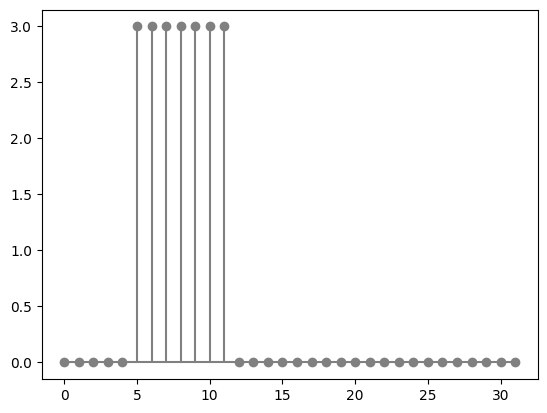

In [13]:
t = np.linspace(0, N - 1, N)

def sigma_d(k):
    v = np.zeros_like(t)
    v[k:] = 1
    return v

s1 = U * (sigma_d(n0) - sigma_d(n0 + n_imp))
plt.stem(t, s1, linefmt='grey', basefmt='grey')

Для моделирования прямоугольного импульса использовалась линейная комбинация двух дискретных единичных скачков $\sigma_{d}(k)$ с различными задержками:

$$s_1(k) = U \cdot \sigma_{d}(k - n_0) - U \cdot \sigma_{d}(k - n_{imp})$$

Где при $k < n_0$ оба сигнала равны нули и итоговый сигнал равен нулю, при $n_0 \leq k < n_{imp}$ только первый сигнал равен единице и итоговый соответственно равен $U$, при $k \geq n_{imp}$ оба сигнала равны единице и в итоге взаимно уничтожаются.

### Задание 2

Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$:

$ s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k), $
где $x_i(k) = B_i\sin(\hat\omega_ik), \quad i = 1, 2, 3,$

с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0, 5N - 1]$.

Вычислить среднее значение (идентификатор `mean_s2`), энергию (идентификатор `E`) и среднюю мощность последовательности $s_2(k)$ (идентификатор `P`).

Пояснить:
- операции при моделировании линейной комбинации сигналов $s_2(k)$;
- как определяют указанные характеристики.

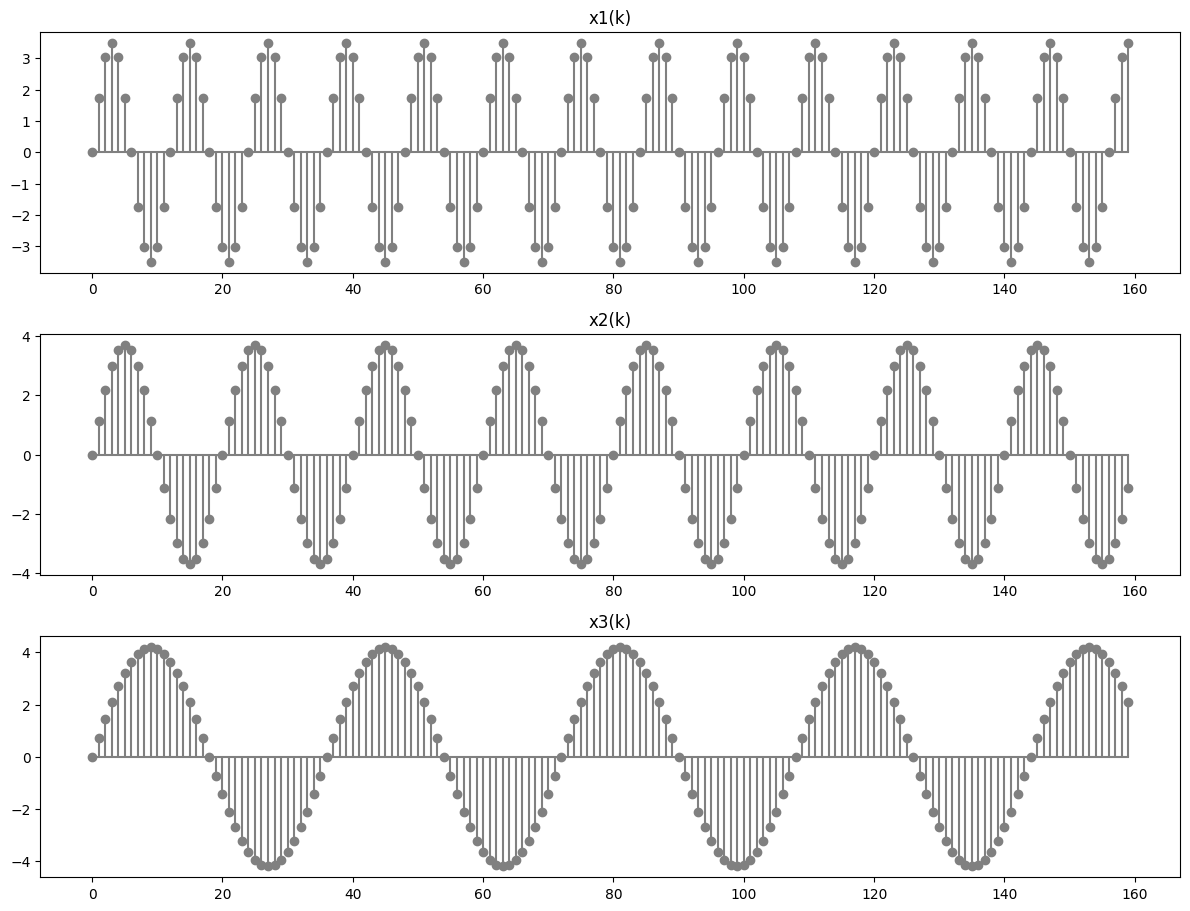

In [14]:
t = np.linspace(0, 5 * N - 1, 5 * N)

x1 = B1 * np.sin(w1 * t)
x2 = B2 * np.sin(w2 * t)
x3 = B3 * np.sin(w3 * t)

s2 = a1 * x1 + a2 * x2 + a3 * x3

plt.figure(figsize=(12, 12))
plt.subplot(4, 1, 1)
plt.stem(t, x1, linefmt='grey', basefmt='grey')
plt.title('x1(k)')

plt.subplot(4, 1, 2)
plt.stem(t, x2, linefmt='grey', basefmt='grey')
plt.title('x2(k)')

plt.subplot(4, 1, 3)
plt.stem(t, x3, linefmt='grey', basefmt='grey')
plt.title('x3(k)')

plt.tight_layout()

Text(0.5, 1.0, 's(k)')

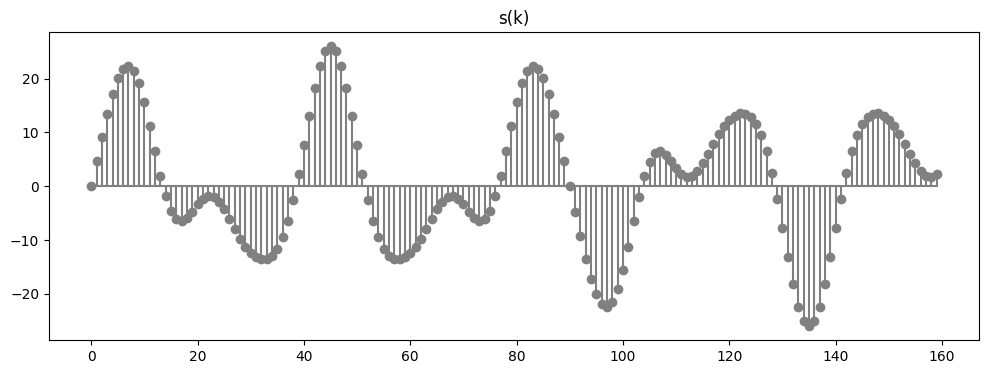

In [15]:
plt.figure(figsize=(12, 4))
plt.stem(t, s2, linefmt='grey', basefmt='grey')
plt.title('s(k)')

Сначала были смоделированны сигналы $x_1(k), x_2(k), x_3(k)$. Далее они были домножены на коэффициенты  $a_1, a_2, a_3$, отвечающие за влияние изначальных сигналов на итоговый. Далее полученные сигналы сложили поточечно.

Из формул видно, что для рассчета числовых характеристик сигнала $s_2$ необходимо знать его период $T$. Так как сигнал $s_2$ является линейной комбинацией сигналов $x_1(k), x_2(k), x_3(k)$, то его период будет равнятся **Наименьшему общему кратному** периоду этих сигналов:

$T = LCM(T_1, T_2, T_3)$

Где $T_1, T_2, T_3$ $-$ периоды $x_1(k), x_2(k), x_3(k)$ соответственно. Так как они являются дискретными гармоническими сигналами с частотами $\hat\omega_i, i=1,2,3$, то их периоды будут равны $T_i = \frac{2\pi}{\hat\omega_i}, i =1,2,3$

In [16]:
T1 = 2 * (4 + Nb % 5)
T2 = 2 * (8 + Nb % 5)
T3 = 2 * (16 + Nb % 5)
T = np.lcm(T1, T2)
T = np.lcm(T, T3)
T

np.int64(180)

Период $T = 180$

In [17]:
t = np.linspace(0, T - 1, T)

x1 = B1 * np.sin(w1 * t)
x2 = B2 * np.sin(w2 * t)
x3 = B3 * np.sin(w3 * t)

s2 = a1 * x1 + a2 * x2 + a3 * x3

Зная период $T$ смоделируем сигнал $s_2$ на интервале времени $n \in [0, T-1]$ и посчитаем его характеристики: $\overline{s_2} = \frac{1}{T}∫_0^Ts(t)dt, E = ∫_0^Ts^2(t)dt, P = \frac{1}{T}∫_0^Ts^2(t)dt$

In [18]:
mean_s2 = np.mean(s2)
E = np.sum(s2**2)
P = E / T

print('Mean(s2) =', np.round(mean_s2, 4))
print('E =', np.round(E, 4))
print('P = ', np.round(P, 4))

Mean(s2) = 0.0
E = 27610.29
P =  153.3905


### Задание 3

Вывести график дискретного сигнала $ s_3(k) $ представляющего собой дискретный гармонический сигнал $s(k)$

$s(k) = C\cos(\hat{\omega}_0k)$ с экспоненциальной огибающей $|a|^k$, на интервале времени $ n \in [0, N-1] $. Привести аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании.

<StemContainer object of 3 artists>

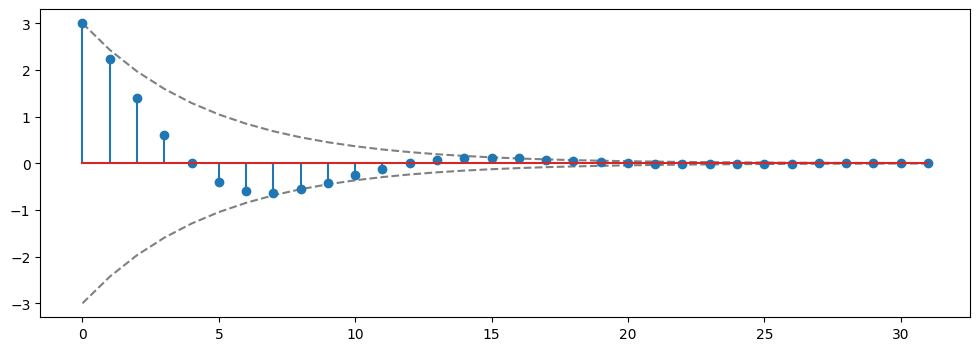

In [19]:
t = np.linspace(0, N-1, N)
s = C * np.cos(w0 * t)
ak = np.pow(np.abs(a), t)
s3 = ak * s

plt.figure(figsize=(12, 4))
plt.plot(ak * C, '--', color='grey')
plt.plot(-ak * C, '--', color='grey')
plt.stem(s3)

Чтобы $|a|^k$ было экспоненциальной огибающией необходимо ограничить амплитуду $s(k)$ так чтобы она не выходила за границы огибающей. Для этого необходимо умножить $s(k)$ на $|a|^k$. Получим $s_3 = s(k) \cdot |a|^k$.

### Задание 4

Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{\text{imp}}$ с периодом, вдвое большим длительности импульса.

Пояснить операции при моделировании периодической последовательности.

<StemContainer object of 3 artists>

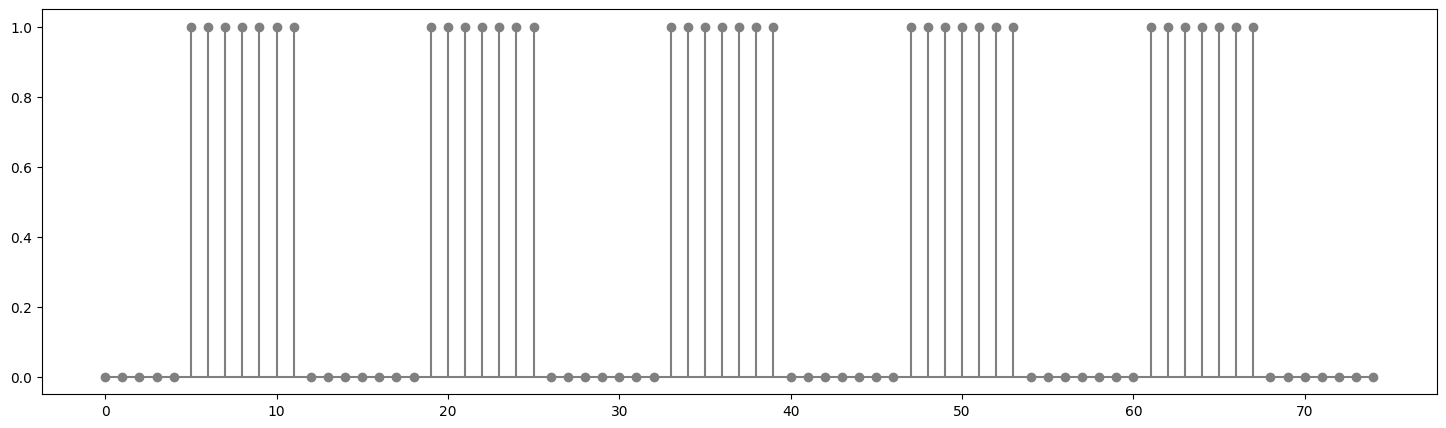

In [20]:
t = np.linspace(0, n0 + 5 * (2 *n_imp) - 1, n0 + 5 * (2 *n_imp))
s4 = np.zeros_like(t)
for i in range(0, 12, 2):
    s4 += sigma_d(n0 + i * (n_imp)) - sigma_d(n0 + (i + 1) * (n_imp))

plt.figure(figsize=(18, 5))
plt.stem(t, s4, linefmt='grey', basefmt='grey')

Аналогично заданию 1 создадим комбинацию дискретных единичных скачков $\sigma_{d}(k)$ с задержками, где для моделирования каждого прямоугольника испольуется вычитание 2 скачков с разницей в задержке $n_{imp}$. А для каждого последующего прямогульника задержка для обоих сигналов увеличивается на $2 \cdot n_{imp}$.

## Выводы



Были изучены математическое описание линейных комбинаций дискретных гармонических сигналов были программно смоделированы некоторые линейные комбинации сигналов: дискретный прямоугольный импульс, комбинация гармонических сигналов с различными периодами, гармонический сигнал с экспоненциальной огибающей и несколько дискретных прямоугольных импульсов идущих подряд. Так же для комбинации дискретных гармонических сигналов были посчитаны характеристики сигнала: среднее значение, энергия и мощность.